In [19]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import re
%matplotlib notebook
import matplotlib.pyplot as plt 

In [20]:
# Importamos el archivo csv
sharks = pd.read_csv("../input/attacks.csv", engine = 'python')

In [21]:
# Usamos shape para saber el número total de registros y columnas
sharks.shape

(25723, 24)

In [22]:
# Visualizamos las columnas para seleccionar posteriormente las que serán significativas para nuestra hipótesis
sharks.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [23]:
# Visualizamos el df con head para conocer los datos con los que vamos a trabajar
sharks.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson�McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [24]:
# Creamos la columna decada para agrupar los años desde 1960
bins = [1959,1969,1979,1989,1999,2009,2019]
labels = list(range(1960,2020,10))
print("bin cuts",bins)
print("labels",labels)
sharks["Decade"] = pd.cut(sharks.Year,
                                bins=bins, 
                                labels=labels)

bin cuts [1959, 1969, 1979, 1989, 1999, 2009, 2019]
labels [1960, 1970, 1980, 1990, 2000, 2010]


In [25]:
sharks

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,Decade
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN,2010
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson�McNeely,F,...,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN,2010
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN,2010
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN,2010
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Hipótesis 1: 
“El mayor número de ataques de tiburón se produjo a surfistas"

In [26]:
# Sobreescribo el df para quedarme con las columnas que son más significativas
df_resume = sharks[['Case Number', 'Year', 'Type', 'Country', 'Area', 'Activity', 'Injury', 'Species ', 'Fatal (Y/N)', 'Decade']]

In [27]:
# Renombro la columna Fatal (Y/N)
df_resume.rename(columns={"Fatal (Y/N)": "Fatality"}, inplace=True)

/usr/local/lib/python3.8/site-packages/pandas/core/frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [28]:
df_resume.head()

,Case Number,Year,Type,Country,Area,Activity,Injury,Species,Fatality,Decade
0,2018.06.25,2018.0,Boating,USA,California,Paddling,"No injury to occupant, outrigger canoe and pad...",White shark,N,2010
1,2018.06.18,2018.0,Unprovoked,USA,Georgia,Standing,Minor injury to left thigh,NaN,N,2010
2,2018.06.09,2018.0,Invalid,USA,Hawaii,Surfing,Injury to left lower leg from surfboard skeg,NaN,N,2010
3,2018.06.08,2018.0,Unprovoked,AUSTRALIA,New South Wales,Surfing,Minor injury to lower leg,2 m shark,N,2010
4,2018.06.04,2018.0,Provoked,MEXICO,Colima,Free diving,Lacerations to leg & hand shark PROVOKED INCIDENT,"Tiger shark, 3m",N,2010


In [29]:
# Quitamos el espacio que hay detrás de la columna 'Species'
df_resume.rename(columns=lambda x: x.rstrip(), inplace=True)
df_resume.columns

/usr/local/lib/python3.8/site-packages/pandas/core/frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Index(['Case Number', 'Year', 'Type', 'Country', 'Area', 'Activity', 'Injury',
       'Species', 'Fatality', 'Decade'],
      dtype='object')

In [30]:
df_resume.dtypes

Case Number      object
Year            float64
Type             object
Country          object
Area             object
Activity         object
Injury           object
Species          object
Fatality         object
Decade         category
dtype: object

In [31]:
df_resume[df_resume.select_dtypes(['category']).columns] = df_resume.select_dtypes(['category']).apply(lambda x: x.astype('float64'))

/usr/local/lib/python3.8/site-packages/pandas/core/frame.py:3062: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [32]:
df_resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Case Number  8702 non-null   object 
 1   Year         6300 non-null   float64
 2   Type         6298 non-null   object 
 3   Country      6252 non-null   object 
 4   Area         5847 non-null   object 
 5   Activity     5758 non-null   object 
 6   Injury       6274 non-null   object 
 7   Species      3464 non-null   object 
 8   Fatality     5763 non-null   object 
 9   Decade       4033 non-null   float64
dtypes: float64(2), object(8)
memory usage: 2.0+ MB


In [33]:
df_resume['Case Number'].duplicated().value_counts()

True     19435
False     6288
Name: Case Number, dtype: int64

In [34]:
df_resume[df_resume['Case Number'].duplicated(keep=False)][['Case Number', 'Year', 'Country', 'Area', 'Injury', 'Species', 'Decade']]

,Case Number,Year,Country,Area,Injury,Species,Decade
522,2014.08.02,2014.0,USA,Florida,Foot bitten,NaN,2010.0
523,2014.08.02,2014.0,USA,Florida,Laceration to ankle,NaN,2010.0
615,2013.10.05,2013.0,USA,California,Laceration to thigh,"White shark, 8' to 10'",2010.0
616,2013.10.05,2013.0,USA,Florida,Lacerations to right forearm,Small bull shark,2010.0
746,2012.09.02.b,2012.0,USA,Florida,Puncture wounds to calf and hand,3.5' to 4' shark,2010.0
...,...,...,...,...,...,...,...
25717,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
index = []

for i in df_resume[df_resume['Case Number'].duplicated()].index:
    index.append(i)

df_resume = df_resume.drop(index,axis=0)

for i in index:
    df_resume[df_resume['Case Number'][i]] = df_resume[df_resume['Case Number'][i] + "z"]

KeyError: 523

In [36]:
df_resume.duplicated().value_counts()

False    6288
dtype: int64

In [37]:
df_resume

,Case Number,Year,Type,Country,Area,Activity,Injury,Species,Fatality,Decade
0,2018.06.25,2018.0,Boating,USA,California,Paddling,"No injury to occupant, outrigger canoe and pad...",White shark,N,2010.0
1,2018.06.18,2018.0,Unprovoked,USA,Georgia,Standing,Minor injury to left thigh,NaN,N,2010.0
2,2018.06.09,2018.0,Invalid,USA,Hawaii,Surfing,Injury to left lower leg from surfboard skeg,NaN,N,2010.0
3,2018.06.08,2018.0,Unprovoked,AUSTRALIA,New South Wales,Surfing,Minor injury to lower leg,2 m shark,N,2010.0
4,2018.06.04,2018.0,Provoked,MEXICO,Colima,Free diving,Lacerations to leg & hand shark PROVOKED INCIDENT,"Tiger shark, 3m",N,2010.0
...,...,...,...,...,...,...,...,...,...,...
6299,ND.0003,0.0,Unprovoked,USA,North Carolina,Swimming,FATAL,NaN,Y,NaN
6300,ND.0002,0.0,Unprovoked,PANAMA,NaN,NaN,FATAL,NaN,Y,NaN
6301,ND.0001,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,Swimming,"FATAL. ""Shark bit him in half, carrying away t...",NaN,Y,NaN
6302,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# Sobreescribo el df puesto que la columna Species no aporta consistencia debido al número de nulos
null_cols = df_resume.isnull().sum()
null_cols

Case Number       1
Year              4
Type              6
Country          52
Area            456
Activity        544
Injury           30
Species        2834
Fatality        537
Decade         2266
dtype: int64

In [39]:
#  Eliminamos las columnas que tienen más de 2500 valores nulos en ellas. Agregamos estos nombres de columna a una lista, y luego pasaremos esas columnas al método de colocación 
# e indicaremos que queremos que se eliminen las columnas (no las filas) estableciendo el parámetro del eje en 1
drop_cols = list(null_cols[null_cols > 2500].index)
df_resume = df_resume.drop(drop_cols, axis=1)

In [40]:
# Cambio los nulos de la columna Decade por 0
null_displ = df_resume[(df_resume['Decade'].isnull()==True)]
df_resume[['Decade']] = df_resume[['Decade']].fillna(0)
df_resume

,Case Number,Year,Type,Country,Area,Activity,Injury,Fatality,Decade
0,2018.06.25,2018.0,Boating,USA,California,Paddling,"No injury to occupant, outrigger canoe and pad...",N,2010.0
1,2018.06.18,2018.0,Unprovoked,USA,Georgia,Standing,Minor injury to left thigh,N,2010.0
2,2018.06.09,2018.0,Invalid,USA,Hawaii,Surfing,Injury to left lower leg from surfboard skeg,N,2010.0
3,2018.06.08,2018.0,Unprovoked,AUSTRALIA,New South Wales,Surfing,Minor injury to lower leg,N,2010.0
4,2018.06.04,2018.0,Provoked,MEXICO,Colima,Free diving,Lacerations to leg & hand shark PROVOKED INCIDENT,N,2010.0
...,...,...,...,...,...,...,...,...,...
6299,ND.0003,0.0,Unprovoked,USA,North Carolina,Swimming,FATAL,Y,0.0
6300,ND.0002,0.0,Unprovoked,PANAMA,NaN,NaN,FATAL,Y,0.0
6301,ND.0001,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,Swimming,"FATAL. ""Shark bit him in half, carrying away t...",Y,0.0
6302,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [41]:
df_resume.head(20)

,Case Number,Year,Type,Country,Area,Activity,Injury,Fatality,Decade
0,2018.06.25,2018.0,Boating,USA,California,Paddling,"No injury to occupant, outrigger canoe and pad...",N,2010.0
1,2018.06.18,2018.0,Unprovoked,USA,Georgia,Standing,Minor injury to left thigh,N,2010.0
2,2018.06.09,2018.0,Invalid,USA,Hawaii,Surfing,Injury to left lower leg from surfboard skeg,N,2010.0
3,2018.06.08,2018.0,Unprovoked,AUSTRALIA,New South Wales,Surfing,Minor injury to lower leg,N,2010.0
4,2018.06.04,2018.0,Provoked,MEXICO,Colima,Free diving,Lacerations to leg & hand shark PROVOKED INCIDENT,N,2010.0
5,2018.06.03.b,2018.0,Unprovoked,AUSTRALIA,New South Wales,Kite surfing,"No injury, board bitten",N,2010.0
6,2018.06.03.a,2018.0,Unprovoked,BRAZIL,Pernambuco,Swimming,FATAL,Y,2010.0
7,2018.05.27,2018.0,Unprovoked,USA,Florida,Fishing,Minor injury to foot. PROVOKED INCIDENT,N,2010.0
8,2018.05.26.b,2018.0,Unprovoked,USA,Florida,Walking,Lower left leg bitten,N,2010.0
9,2018.05.26.a,2018.0,Unprovoked,USA,Florida,Standing,Minor injury to foot,N,2010.0


In [42]:
df_resume['Year'] = df_resume['Year'].fillna(0).astype(int)

In [43]:
df_resume['Decade'] = df_resume['Decade'].fillna(0).astype(int)

In [44]:
df_resume

,Case Number,Year,Type,Country,Area,Activity,Injury,Fatality,Decade
0,2018.06.25,2018,Boating,USA,California,Paddling,"No injury to occupant, outrigger canoe and pad...",N,2010
1,2018.06.18,2018,Unprovoked,USA,Georgia,Standing,Minor injury to left thigh,N,2010
2,2018.06.09,2018,Invalid,USA,Hawaii,Surfing,Injury to left lower leg from surfboard skeg,N,2010
3,2018.06.08,2018,Unprovoked,AUSTRALIA,New South Wales,Surfing,Minor injury to lower leg,N,2010
4,2018.06.04,2018,Provoked,MEXICO,Colima,Free diving,Lacerations to leg & hand shark PROVOKED INCIDENT,N,2010
...,...,...,...,...,...,...,...,...,...
6299,ND.0003,0,Unprovoked,USA,North Carolina,Swimming,FATAL,Y,0
6300,ND.0002,0,Unprovoked,PANAMA,NaN,NaN,FATAL,Y,0
6301,ND.0001,0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,Swimming,"FATAL. ""Shark bit him in half, carrying away t...",Y,0
6302,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0


In [45]:
# Comprobamos cuál es la actividad que tiene mayor impacto en los ataques de tiburón
df_resume.Activity.value_counts()

Surfing                                                 968
Swimming                                                869
Fishing                                                 430
Spearfishing                                            331
Bathing                                                 162
                                                       ... 
A junk foundered                                          1
Surf fishing / wading                                     1
Attempting to drive shark away from the beach             1
In waist-deep water                                       1
Fishing, trying to catch the end of his fishing line      1
Name: Activity, Length: 1530, dtype: int64

In [46]:
# Filtramos por la Actividad Surfing para quedarnos con los datos que nos interesan
df_sharks = df_resume[df_resume.Activity == 'Surfing']

In [47]:
display(df_sharks)

,Case Number,Year,Type,Country,Area,Activity,Injury,Fatality,Decade
2,2018.06.09,2018,Invalid,USA,Hawaii,Surfing,Injury to left lower leg from surfboard skeg,N,2010
3,2018.06.08,2018,Unprovoked,AUSTRALIA,New South Wales,Surfing,Minor injury to lower leg,N,2010
15,2018.05.12,2018,Unprovoked,SOUTH AFRICA,Eastern Cape Province,Surfing,"Minor injury, marks on board",N,2010
16,2018.05.09,2018,Questionable,AUSTRALIA,New South Wales,Surfing,"No injury, surfboard damaged",N,2010
19,2018.04.28.a,2018,Unprovoked,AUSTRALIA,Western Australia,Surfing,"No injury, knocked off board by shark",N,2010
...,...,...,...,...,...,...,...,...,...
5235,1922.01.04,1922,Unprovoked,AUSTRALIA,New South Wales,Surfing,"FATAL, disappeared, then his shark-bitten rema...",Y,0
5280,1918.03.22,1918,Unprovoked,AUSTRALIA,New South Wales,Surfing,"Severe laceration to arm, necessitating surgic...",N,0
6097,1828.00.00,1828,Unprovoked,USA,Hawaii,Surfing,FATAL,Y,0
6143,1779.00.00,1779,Unprovoked,USA,Hawaii,Surfing,"FATAL, buttock lacerated",Y,0


## Hipótesis 2
"Estados Unidos es el país con más ataques de tiburones a surfistas"

In [48]:
# Comprobamos cuál es el país que tiene mayor impacto en los ataques de tiburón
df_sharks.Country.value_counts()

USA                                      563
AUSTRALIA                                195
SOUTH AFRICA                              95
BRAZIL                                    36
REUNION                                   20
NEW ZEALAND                               12
MEXICO                                     6
INDONESIA                                  6
COSTA RICA                                 4
ECUADOR                                    4
JAPAN                                      3
FRENCH POLYNESIA                           2
EL SALVADOR                                2
VENEZUELA                                  2
BAHAMAS                                    2
NEW CALEDONIA                              2
FIJI                                       2
DOMINICAN REPUBLIC                         1
MOZAMBIQUE                                 1
CANADA                                     1
OKINAWA                                    1
MEXICO                                     1
UNITED ARA

In [49]:
# Reescribo el df para agregar por país y año
df_sharks_country = df_sharks.groupby(['Country'])['Year'].count().sort_values(ascending=False).head()

In [50]:
display(df_sharks_country)

Country
USA             563
AUSTRALIA       195
SOUTH AFRICA     95
BRAZIL           36
REUNION          20
Name: Year, dtype: int64

<IPython.core.display.Javascript object>


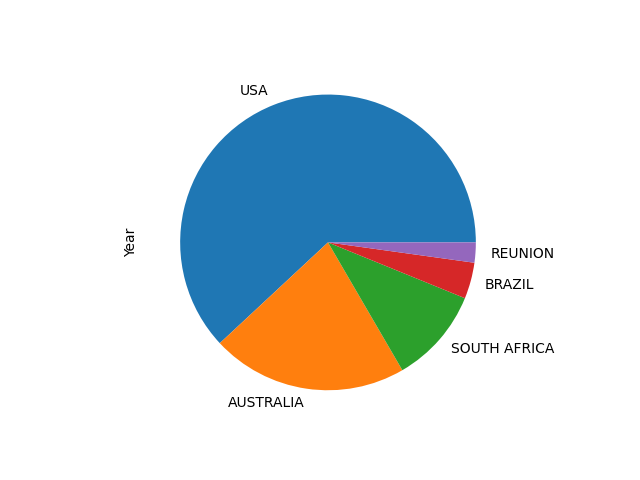

<AxesSubplot:ylabel='Year'>

In [51]:
df_sharks_country.plot.pie()

## Hipótesis 3
"El número de casos ataques a surfistas en Estados Unidos y Australia aumenta cada década"

In [52]:
# Comprobamos los años que tienen mayor impacto en los ataques de tiburón
df_sharks.Year.value_counts()

2015    42
2012    42
2016    40
2007    38
2008    38
        ..
1955     1
1957     1
1960     1
1963     1
0        1
Name: Year, Length: 70, dtype: int64

In [53]:
df_sharks.sort_values('Year', ascending=True)

,Case Number,Year,Type,Country,Area,Activity,Injury,Fatality,Decade
6201,ND-0122,0,Unprovoked,USA,Florida,Surfing,Legs bitten,N,0
6143,1779.00.00,1779,Unprovoked,USA,Hawaii,Surfing,"FATAL, buttock lacerated",Y,0
6097,1828.00.00,1828,Unprovoked,USA,Hawaii,Surfing,FATAL,Y,0
5280,1918.03.22,1918,Unprovoked,AUSTRALIA,New South Wales,Surfing,"Severe laceration to arm, necessitating surgic...",N,0
5235,1922.01.04,1922,Unprovoked,AUSTRALIA,New South Wales,Surfing,"FATAL, disappeared, then his shark-bitten rema...",Y,0
...,...,...,...,...,...,...,...,...,...
38,2018.03.09.a,2018,Unprovoked,AUSTRALIA,Victoria,Surfing,"Minor injury, ankle grazed",N,2010
51,2018.01.12,2018,Unprovoked,BRAZIL,Fernando de Noronha,Surfing,Minor injury to left forearm,N,2010
52,2018.01.05,2018,Unprovoked,AUSTRALIA,Western Australia,Surfing,Foot bitten,N,2010
22,2018.04.24,2018,Unprovoked,AUSTRALIA,Western Australia,Surfing,"No injury, shark struck his leg",N,2010


In [54]:
# Agregamos por País y década haciendo un count de los años
analysis_decade = df_sharks.groupby(["Activity","Decade"]).agg({
    "Year":"count"})
display(analysis_decade) 
# Quedan 2 años para completar la década de 2010

Year
Activity Decade      
Surfing  0         13
         1960      18
         1970      48
         1980     101
         1990     160
         2000     314
         2010     314

<IPython.core.display.Javascript object>


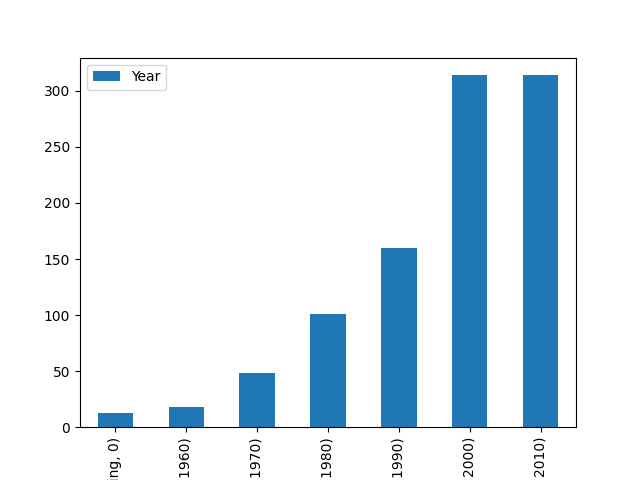

<AxesSubplot:xlabel='Activity,Decade'>

In [55]:
analysis_decade.plot(kind='bar')

,Year
Decade,
1960,9
1970,29
1980,63
1990,92
2000,207
2010,160


<IPython.core.display.Javascript object>


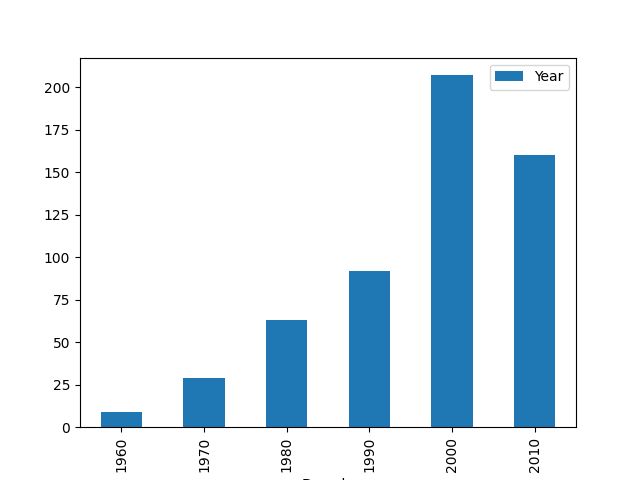

<AxesSubplot:xlabel='Decade'>

In [56]:
a =  sharks[sharks.Activity == "Surfing"]
USA = a[a.Country=="USA"].groupby("Decade").agg({"Year":"count"})

display(USA)
USA.plot(kind='bar')
# Quedan 2 años para completar la década de 2010

,Year
Decade,
1960,6
1970,8
1980,11
1990,15
2000,54
2010,92


<IPython.core.display.Javascript object>


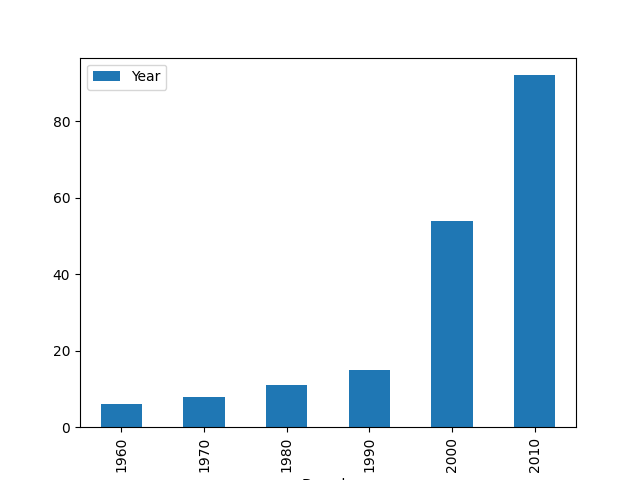

<AxesSubplot:xlabel='Decade'>

In [57]:
AUSTRALIA = a[a.Country=="AUSTRALIA"].groupby("Decade").agg({"Year":"count"})

display(AUSTRALIA)
AUSTRALIA.plot(kind='bar')
# Quedan 2 años para completar la década de 2010

## Hipotésis 4

???¿¿¿ ataques graves a surfistas

In [58]:
df_sharks["Type"].value_counts()

Unprovoked      915
Invalid          39
Provoked         11
Questionable      2
Name: Type, dtype: int64

In [59]:
# Número de ataques que han sido graves 
df_sharks["Fatality"].value_counts()

N          876
Y           49
UNKNOWN      6
Name: Fatality, dtype: int64

In [60]:
df_sharks

,Case Number,Year,Type,Country,Area,Activity,Injury,Fatality,Decade
2,2018.06.09,2018,Invalid,USA,Hawaii,Surfing,Injury to left lower leg from surfboard skeg,N,2010
3,2018.06.08,2018,Unprovoked,AUSTRALIA,New South Wales,Surfing,Minor injury to lower leg,N,2010
15,2018.05.12,2018,Unprovoked,SOUTH AFRICA,Eastern Cape Province,Surfing,"Minor injury, marks on board",N,2010
16,2018.05.09,2018,Questionable,AUSTRALIA,New South Wales,Surfing,"No injury, surfboard damaged",N,2010
19,2018.04.28.a,2018,Unprovoked,AUSTRALIA,Western Australia,Surfing,"No injury, knocked off board by shark",N,2010
...,...,...,...,...,...,...,...,...,...
5235,1922.01.04,1922,Unprovoked,AUSTRALIA,New South Wales,Surfing,"FATAL, disappeared, then his shark-bitten rema...",Y,0
5280,1918.03.22,1918,Unprovoked,AUSTRALIA,New South Wales,Surfing,"Severe laceration to arm, necessitating surgic...",N,0
6097,1828.00.00,1828,Unprovoked,USA,Hawaii,Surfing,FATAL,Y,0
6143,1779.00.00,1779,Unprovoked,USA,Hawaii,Surfing,"FATAL, buttock lacerated",Y,0
